#### 1. Preparación del Entorno y Datos

In [19]:
# --- Celda 1: Importar librerías y cargar datos ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# en segunda instancia
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [7]:
# Usamos una URL para que los estudiantes no necesiten descargar el archivo
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df0 = pd.read_csv(url)

In [8]:
titanic = df0.copy()

In [9]:
print("Primeras filas del dataset:")
df0.head()
print("\nInformación general y valores nulos:")
df0.info()

Primeras filas del dataset:

Información general y valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# Seleccionar y preprocesar características
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
df = titanic[features].copy()

In [11]:
# Manejar valores faltantes
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

/tmp/ipykernel_17297/1826217168.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_17297/1826217168.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [13]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# Estandarizar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

#### 2. Visualización Inicial de Datos

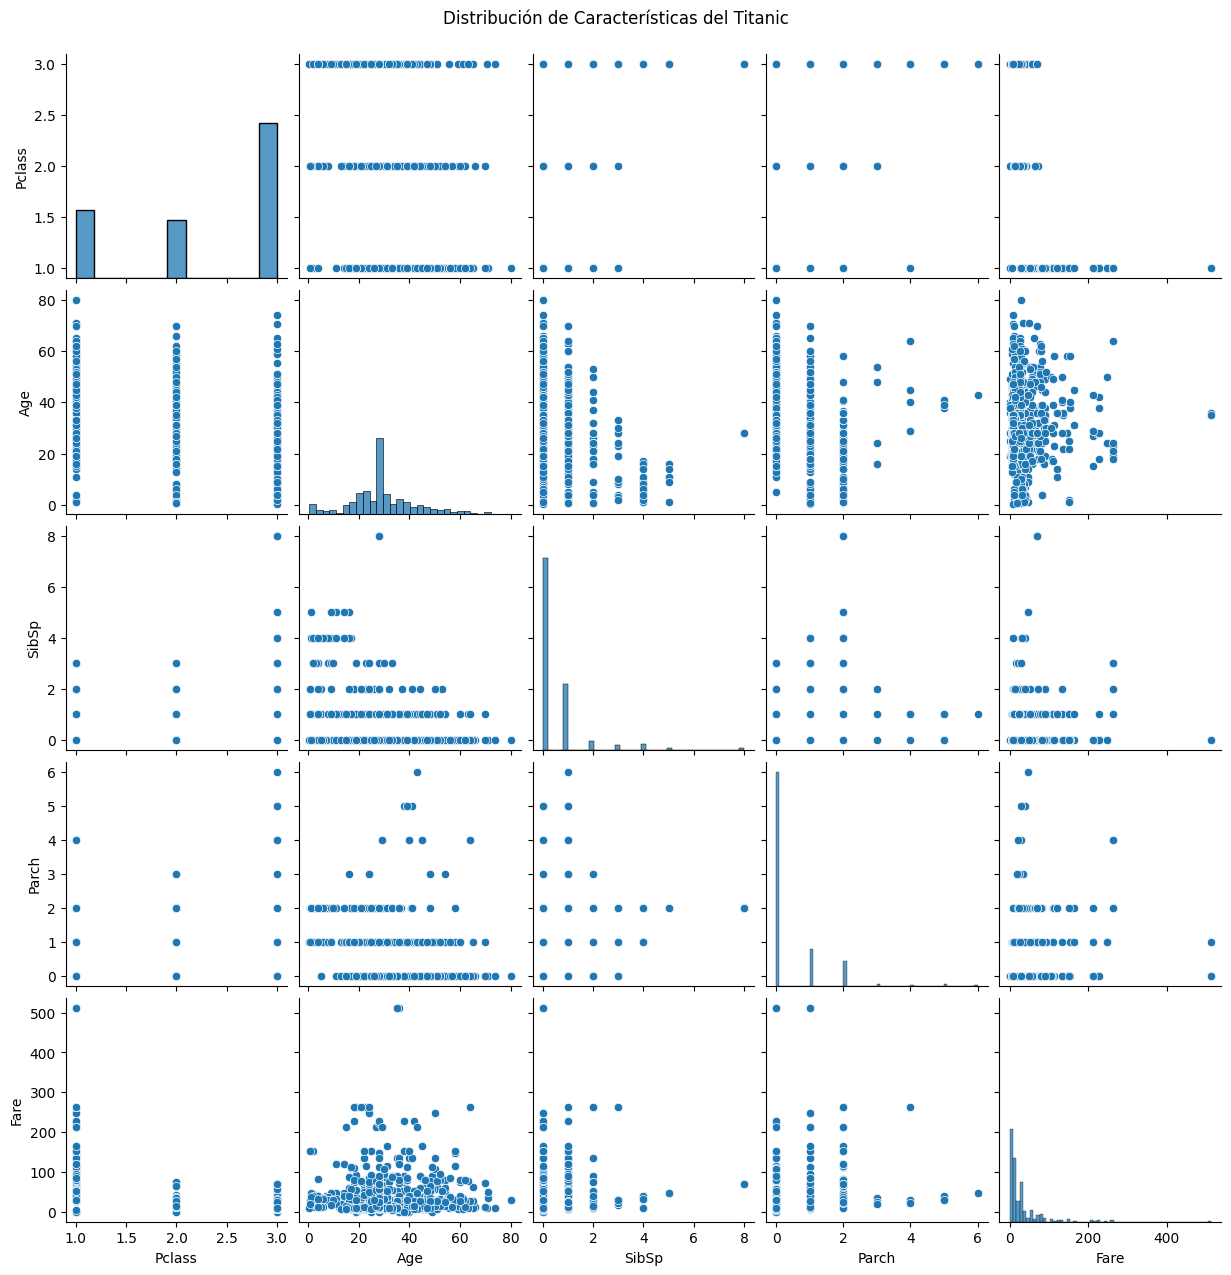

In [15]:
# Matriz de dispersión
sns.pairplot(df)
plt.suptitle('Distribución de Características del Titanic', y=1.02)
plt.show()


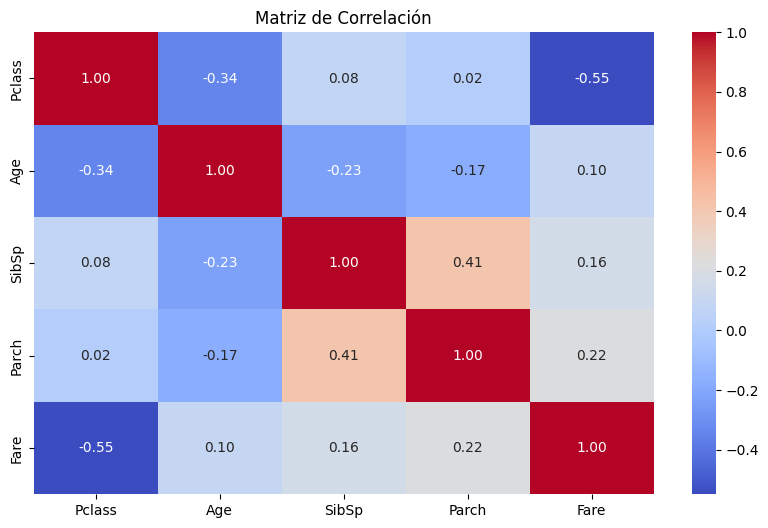

In [16]:
# Correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

#### 3. Determinación del Número Óptimo de Clusters (K)

##### Método del Codo (Elbow Method):

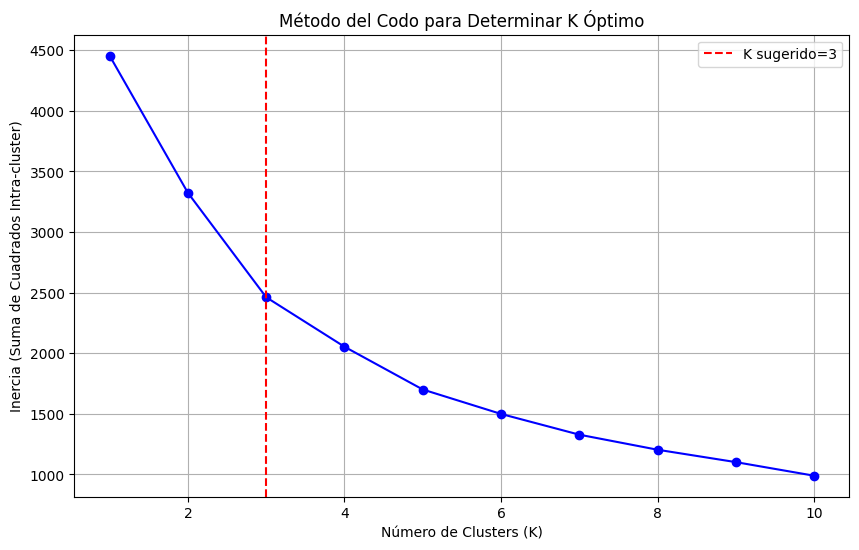

In [21]:
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia (Suma de Cuadrados Intra-cluster)')
plt.title('Método del Codo para Determinar K Óptimo')
plt.axvline(x=3, color='r', linestyle='--', label='K sugerido=3')
plt.grid(True)
plt.legend()
plt.show()

##### Método de la Silueta (Silhouette Score):

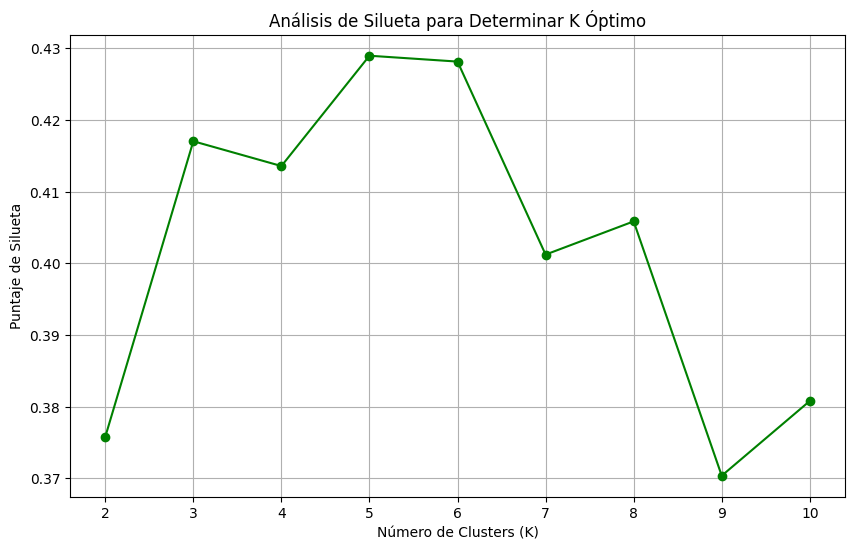

In [22]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, 'go-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Puntaje de Silueta')
plt.title('Análisis de Silueta para Determinar K Óptimo')
plt.grid(True)
plt.show()

#### 4. Implementación de K-Means con K=3

In [23]:
# Paso 1: Inicialización de centroides (K-Means++)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)

# Pasos 2-4: Asignación y actualización iterativa
kmeans.fit(X_scaled)

# Obtener resultados
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

#### 5. Visualización de Resultados

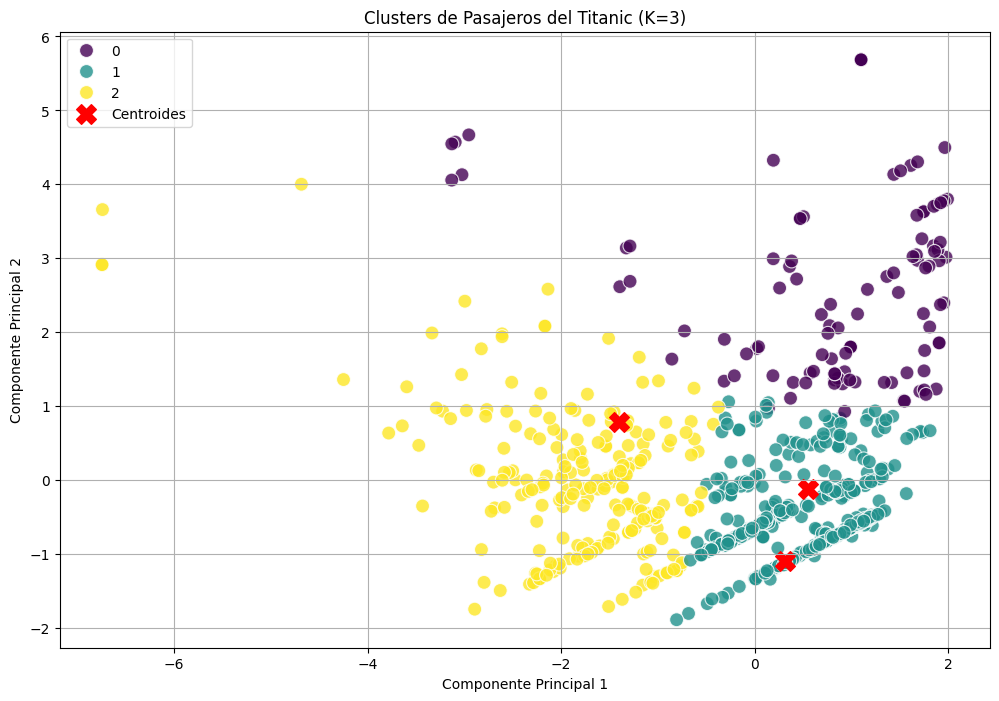

In [24]:
# Reducción a 2D para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear DataFrame para visualización
results_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
results_df['Cluster'] = cluster_labels
results_df['Survived'] = titanic['Survived'].values

# Graficar clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', 
                palette='viridis', data=results_df, 
                s=100, alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], 
            marker='X', s=200, c='red', label='Centroides')
plt.title('Clusters de Pasajeros del Titanic (K=3)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

#### 6. Interpretación de los Clusters

Resumen Estadístico por Cluster:


,Pclass,Age,SibSp,Parch,Fare,Survived,Count
Cluster,,,,,,,
0,2.572727,13.358247,2.336364,1.936364,45.921856,0.454545,110
1,2.771218,27.719167,0.225092,0.110701,12.191819,0.284133,542
2,1.138075,41.148325,0.364017,0.280335,71.274390,0.577406,239


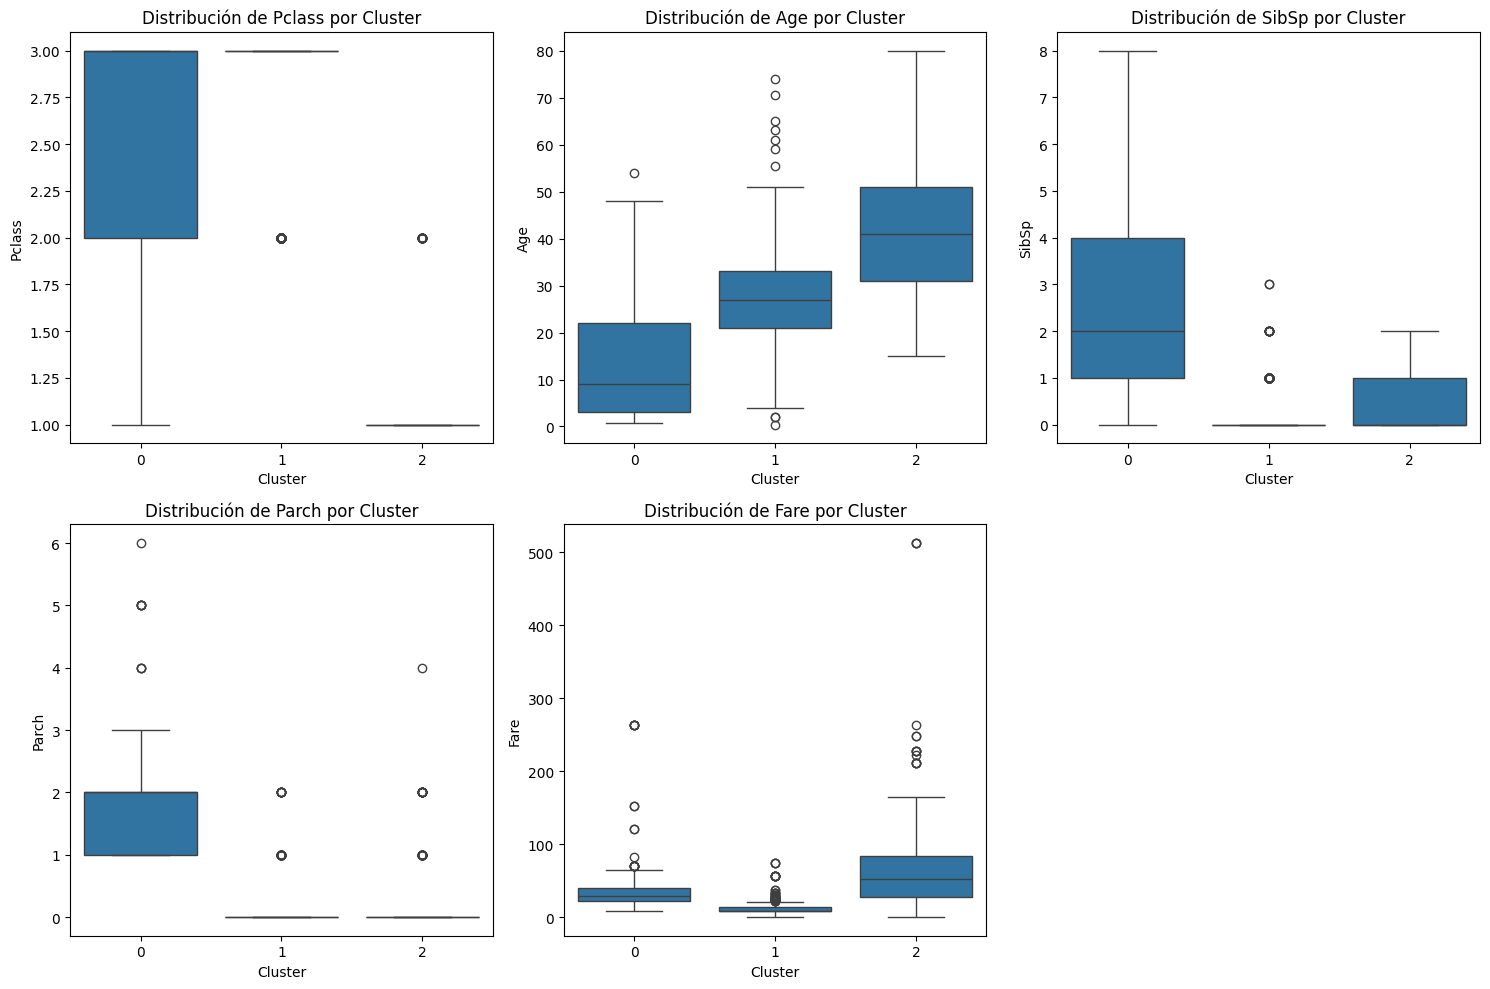

In [25]:
# Añadir etiquetas de cluster al DataFrame original
titanic_clustered = titanic.copy()
titanic_clustered['Cluster'] = cluster_labels

# Analizar características por cluster
cluster_summary = titanic_clustered.groupby('Cluster').agg({
    'Pclass': 'mean',
    'Age': 'mean',
    'SibSp': 'mean',
    'Parch': 'mean',
    'Fare': 'mean',
    'Survived': 'mean',
    'PassengerId': 'count'
}).rename(columns={'PassengerId': 'Count'})

print("Resumen Estadístico por Cluster:")
display(cluster_summary)

# Visualizar distribución de características
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Cluster', y=feature, data=titanic_clustered)
    plt.title(f'Distribución de {feature} por Cluster')
plt.tight_layout()
plt.show()

#### 7. Análisis de Supervivencia por Cluster

/tmp/ipykernel_17297/8972365.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y='Survived', data=titanic_clustered,
/tmp/ipykernel_17297/8972365.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Survived', data=titanic_clustered,


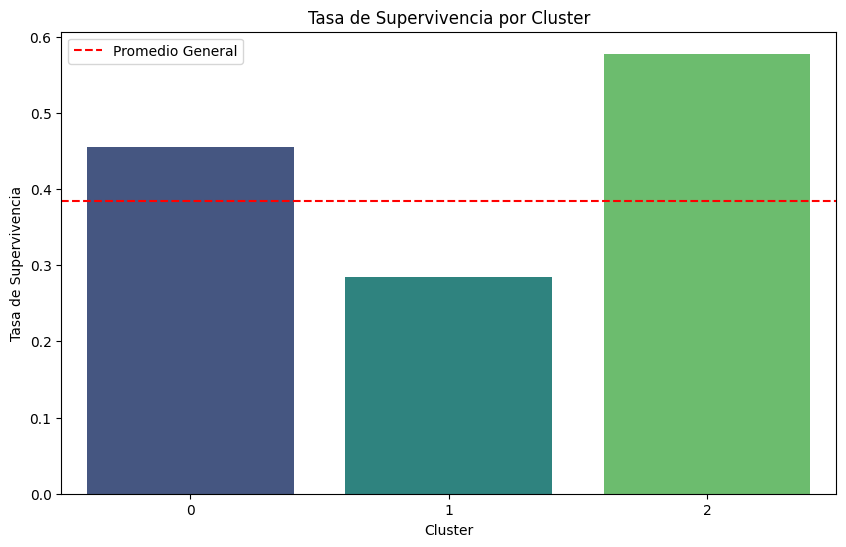

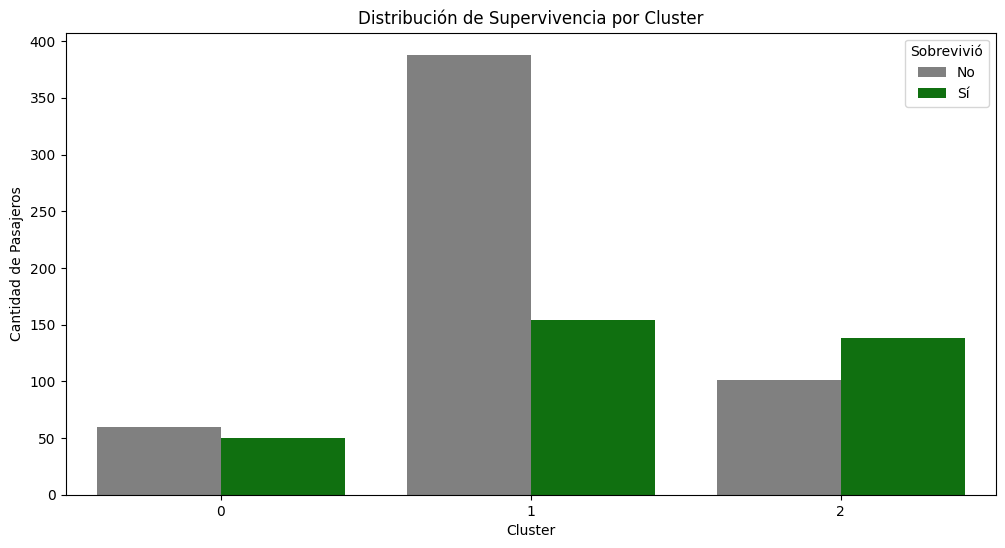

In [26]:
# Tasa de supervivencia por cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Survived', data=titanic_clustered, 
            estimator=np.mean, ci=None, palette='viridis')
plt.title('Tasa de Supervivencia por Cluster')
plt.ylabel('Tasa de Supervivencia')
plt.axhline(y=titanic_clustered['Survived'].mean(), 
            color='r', linestyle='--', label='Promedio General')
plt.legend()
plt.show()

# Distribución de supervivencia en cada cluster
plt.figure(figsize=(12, 6))
sns.countplot(x='Cluster', hue='Survived', data=titanic_clustered, 
              palette={0: 'gray', 1: 'green'})
plt.title('Distribución de Supervivencia por Cluster')
plt.ylabel('Cantidad de Pasajeros')
plt.legend(title='Sobrevivió', labels=['No', 'Sí'])
plt.show()

#### 8. Perfiles de Pasajeros por Cluster

In [27]:
# Función para crear perfiles
def create_passenger_profile(cluster_id):
    cluster_data = titanic_clustered[titanic_clustered['Cluster'] == cluster_id]
    profile = {
        'Edad Promedio': cluster_data['Age'].mean(),
        'Tarifa Promedio': cluster_data['Fare'].mean(),
        'Tamaño Familiar Promedio': (cluster_data['SibSp'] + cluster_data['Parch']).mean(),
        'Tasa Supervivencia': cluster_data['Survived'].mean(),
        'Clase Social': cluster_data['Pclass'].mode()[0]
    }
    return profile

# Crear perfiles para cada cluster
profiles = {}
for cluster in range(3):
    profiles[f'Cluster {cluster}'] = create_passenger_profile(cluster)

# Convertir a DataFrame para mejor visualización
profile_df = pd.DataFrame(profiles).T
print("\nPerfiles de Pasajeros por Cluster:")
display(profile_df)


Perfiles de Pasajeros por Cluster:


,Edad Promedio,Tarifa Promedio,Tamaño Familiar Promedio,Tasa Supervivencia,Clase Social
Cluster 0,13.358247,45.921856,4.272727,0.454545,3.0
Cluster 1,27.719167,12.191819,0.335793,0.284133,3.0
Cluster 2,41.148325,71.274390,0.644351,0.577406,1.0


#### 9. Validación y Análisis de Estabilidad

In [28]:
# Evaluar consistencia con silhouette score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Función para ver estabilidad de clusters
def check_cluster_stability(X, k=3, n_runs=10):
    common_labels = []
    for _ in range(n_runs):
        kmeans = KMeans(n_clusters=k, random_state=None, n_init=1)
        labels = kmeans.fit_predict(X)
        common_labels.append(labels)
    
    # Calcular consistencia
    consistency = np.mean([
        np.mean(common_labels[0] == other_labels) 
        for other_labels in common_labels[1:]
    ])
    return consistency

stability = check_cluster_stability(X_scaled)
print(f"Estabilidad de Clusters: {stability:.2%}")

Silhouette Score: 0.417
Estabilidad de Clusters: 46.12%
